1° Análise Exploratória dos Dados

---

Interpretações clínicas suportadas
de mutações relacionadas ao câncer

##Bibliotecas

In [20]:
import json
import pandas as pd
from matplotlib import patches
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import io

##**Fonte:**
https://civic.readthedocs.io/en/latest/api.html

##Carregando os Dados

In [21]:
#Dados
df = pd.read_csv('/content/Civic (1) - Copia.csv')
# Vendo os primeiros registros
df.head(5)

,gene,entrez_id,variant,disease,doid,phenotypes,drugs,drug_interaction_type,evidence_type,evidence_direction,...,variant_summary,variant_origin,is_flagged,variant_types,hgvs_expressions,civic_variant_evidence_score,allele_registry_id,clinvar_ids,variant_aliases,description
0,JAK2,3717,V617F,Lymphoid Leukemia,1037.0,NaN,NaN,NaN,Diagnostic,Supports,...,JAK2 V617F is a highly recurrent mutation in m...,Somatic,False,"missense_variant,gain_of_function_variant","NC_000009.11:g.5073770G>T,NM_004972.3:c.1849G>...",83.0,CA124183,14662,"VAL617PHE,RS77375493",JAK2 is a kinase that is misregulated or mutat...
1,PDGFRA,5156,D842V,Gastrointestinal Stromal Tumor,9253.0,NaN,NaN,NaN,Diagnostic,Supports,...,PDGFRA D842 mutations are characterized broadl...,Somatic,False,missense_variant,"NM_006206.4:c.2525A>T,NP_006197.1:p.Asp842Val,...",100.5,CA123194,13543,"ASP842VAL,RS121908585","Commonly mutated in GI tract tumors, PDGFR fam..."
2,DNMT3A,1788,R882,Acute Myeloid Leukemia,9119.0,NaN,NaN,NaN,Diagnostic,Supports,...,DNMT3A R882 mutations are associated with cyto...,Somatic,False,missense_variant,NaN,510.0,NaN,"375882,375883,375884,375879,375880,375881","R693,ARG882,ARG693",DNMT3A is one of several epigenetic modifiers ...
3,DNMT3A,1788,R882,Acute Myeloid Leukemia,9119.0,NaN,NaN,NaN,Diagnostic,Supports,...,DNMT3A R882 mutations are associated with cyto...,Somatic,False,missense_variant,NaN,510.0,NaN,"375882,375883,375884,375879,375880,375881","R693,ARG882,ARG693",DNMT3A is one of several epigenetic modifiers ...
4,JAK2,3717,V617F,Chronic Myeloid Leukemia,8552.0,NaN,NaN,NaN,Diagnostic,Supports,...,JAK2 V617F is a highly recurrent mutation in m...,Somatic,False,"missense_variant,gain_of_function_variant","NC_000009.11:g.5073770G>T,NM_004972.3:c.1849G>...",83.0,CA124183,14662,"VAL617PHE,RS77375493",JAK2 is a kinase that is misregulated or mutat...


In [22]:
# Lista de colunas desejadas
cols_desejadas = ['gene', 'variant', 'disease', 'drugs', 'evidence_type',
                  'clinical_significance', 'evidence_level', 'rating', 'chromosome',
                  'variant_origin']

# Seleciona as colunas desejadas no DataFrame
df_selecionado = df[cols_desejadas]

Selecionando as colunas desejadas no DataFrame para Refinar a Análise


In [23]:
# Dicionário de mapeamento de nomes originais para nomes traduzidos em português
mapeamento_colunas = {'gene': 'gene', 'variant': 'variante', 'disease': 'doença', 'drugs': 'medicamentos',
                      'evidence_type': 'tipo_evidência', 'clinical_significance': 'significado_clínico',
                      'evidence_level': 'nível_evidência', 'rating': 'classificação', 'chromosome': 'cromossomo',
                      'variant_origin': 'origem_variante'}

# Renomear as colunas selecionadas no DataFrame
df_selecionado = df_selecionado.rename(columns=mapeamento_colunas)
df_selecionado

,gene,variante,doença,medicamentos,tipo_evidência,significado_clínico,nível_evidência,classificação,cromossomo,origem_variante
0,JAK2,V617F,Lymphoid Leukemia,NaN,Diagnostic,Negative,B,4.0,9,Somatic
1,PDGFRA,D842V,Gastrointestinal Stromal Tumor,NaN,Diagnostic,Negative,B,3.0,4,Somatic
2,DNMT3A,R882,Acute Myeloid Leukemia,NaN,Diagnostic,Positive,B,2.0,2,Somatic
3,DNMT3A,R882,Acute Myeloid Leukemia,NaN,Diagnostic,Positive,B,3.0,2,Somatic
4,JAK2,V617F,Chronic Myeloid Leukemia,NaN,Diagnostic,Positive,B,4.0,9,Somatic
...,...,...,...,...,...,...,...,...,...,...
3892,ERCC1,Underexpression,Ovary Epithelial Cancer,Platinum Compound,Predictive,Sensitivity/Response,B,3.0,19,NaN
3893,NTRK1,Amplification,Solid Tumor,Larotrectinib,Predictive,Sensitivity/Response,C,2.0,1,Somatic
3894,CTCF,K365T,NaN,NaN,Functional,Gain of Function,D,3.0,NaN,NaN
3895,KIT,EXPRESSION,Glioblastoma,Sunitinib,Predictive,Sensitivity/Response,B,3.0,4,Somatic


Renomeando as colunas selecionadas no DataFrame

##Análise Gráfica Exploratória das Principais Variáveis

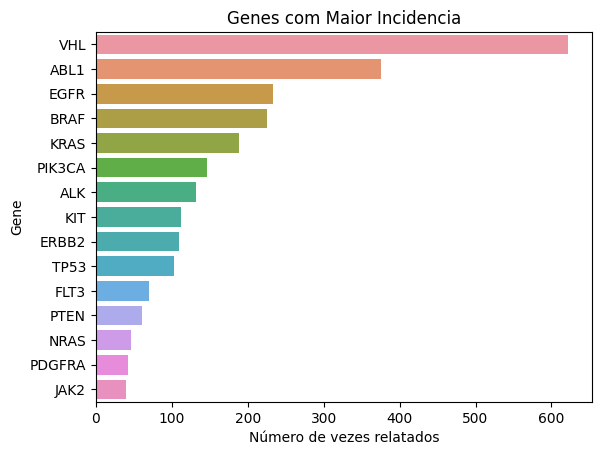

In [24]:
#Gráfico 1
sns.barplot(x = df_selecionado['gene'].value_counts()[:15],
            y = df_selecionado['gene'].value_counts()[:15].index)

plt.title("Genes com Maior Incidencia")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Gene")
plt.show()

Esse gráfico tem como objetivo mostrar os 15 primeiros genes com maior incidência, dessa forma podemos ver qual gene sofre multação com mais frequencia. OBS: O gene VHL resposavel pelo câncer renal secundário está em primeiro lugar na lista enquanto o gene TP53 responsavel pelo câncer de pele esta em 10° lugar e é o mais frequente no Brasil enquanto o de pulmão que é o mais comum no mundo e está em 21° lugar.

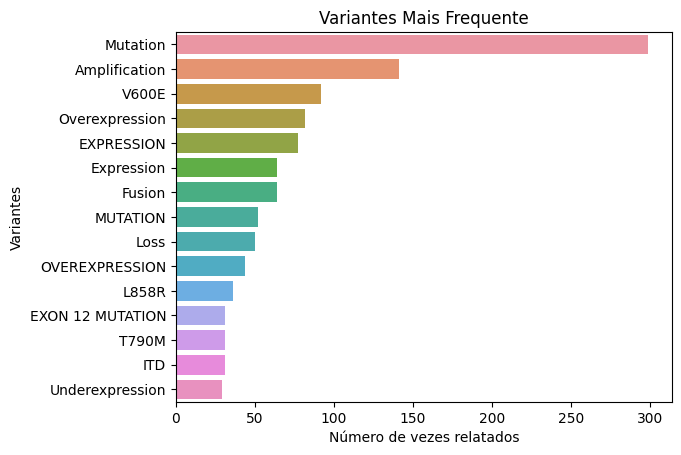

In [25]:
#Gráfico 2
sns.barplot(x = df_selecionado['variante'].value_counts()[:15],
            y = df_selecionado['variante'].value_counts()[:15].index)

plt.title("Variantes Mais Frequente")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Variantes")
plt.show()

Nossa base de dados esta repleta de tipos de variants, nesse gráfico aptamos por mostrar apenas as 15° com maior incidência para uma melhor visualização.



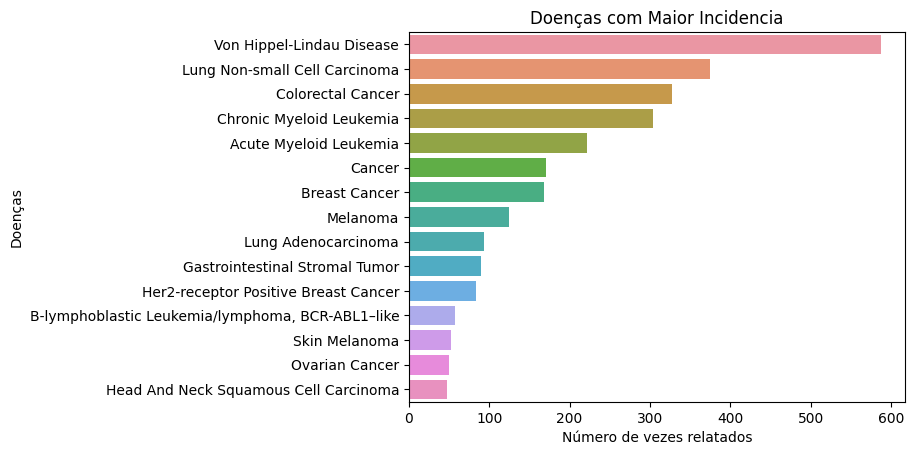

In [26]:
#Gráfico 3
sns.barplot(x = df_selecionado['doença'].value_counts()[:15],
            y = df_selecionado['doença'].value_counts()[:15].index)

plt.title("Doenças com Maior Incidencia")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Doenças")
plt.show()

Assim como o gráfico de Variant optamos por mostrar apenas 15 itens pra melhor visualização. OBS: Podemos observar, por exemplo, que a doença Von Hippel-Lindau Disease esta diretamente ligada ao gene VHL, por isso ambos esta em primeiro lugar e com maior incidência.

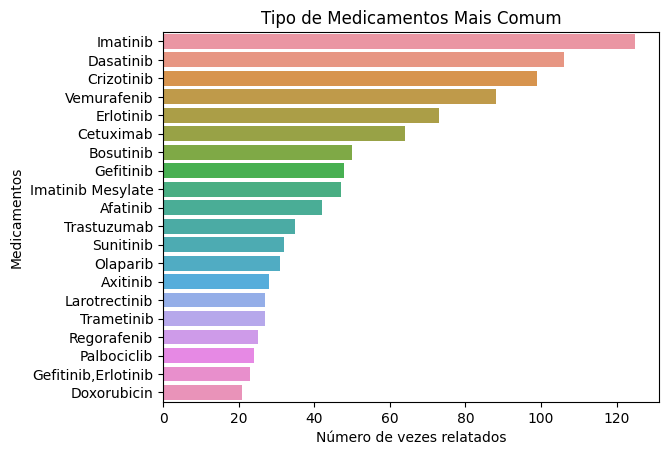

In [27]:
#Gráfico 4
sns.barplot(x = df_selecionado['medicamentos'].value_counts()[:20],
            y = df_selecionado['medicamentos'].value_counts()[:20].index)

plt.title("Tipo de Medicamentos Mais Comum")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Medicamentos")
plt.show()

Em nossa base observamos que varias drogas foram usadas durante os tratamentos, nesse gráfico plotamos apenas 20 das drogas mais usadas.

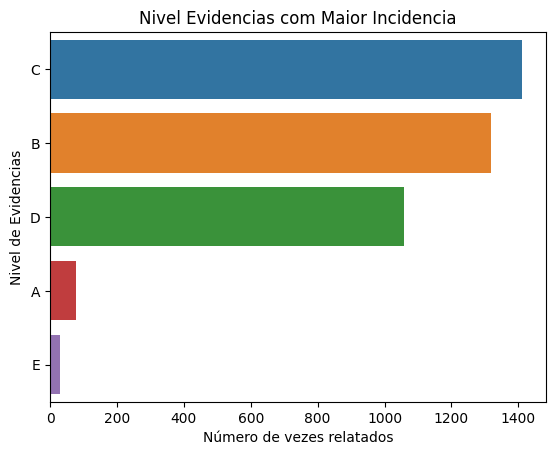

In [28]:
#Gráfico 5
sns.barplot(x = df_selecionado['nível_evidência'].value_counts()[:10],
            y = df_selecionado['nível_evidência'].value_counts()[:10].index)

plt.title("Nivel Evidencias com Maior Incidencia")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Nivel de Evidencias")
plt.show()

Aqui visualizarmos a robustez do estudo suportado pela evidência, podemos ver que "C - Estudo de caso" possui a maior incidência com 200 itens a mais e "E - Associanção inferencial" possui a menor quantidade com menos de 200 itens.

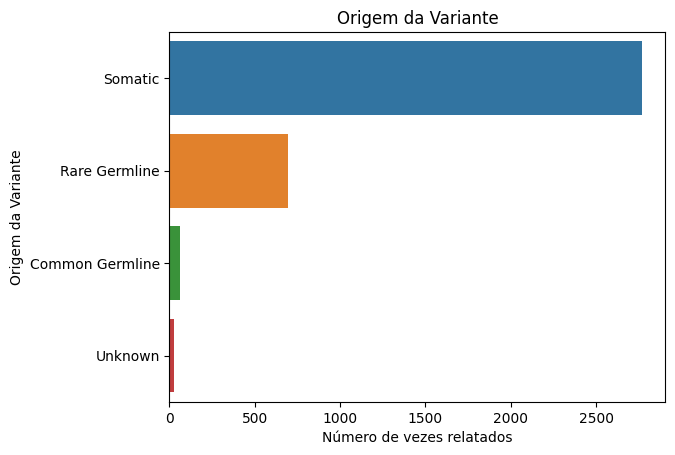

In [29]:
#Gráfico 6
sns.barplot(x = df_selecionado['origem_variante'].value_counts()[:10],
            y = df_selecionado['origem_variante'].value_counts()[:10].index)

plt.title("Origem da Variante")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Origem da Variante")
plt.show()

Como a variant começou ?

Nesse gráfico visualizamos que a maior parte das doenças cancerigenas começaram como somaticas, ou seja que surgem pontualmente em alguma célula do corpo e a menor parte como common gemline, ou seja presente nas células germinativas, cancer que pode ser transferido de pais para filhos.

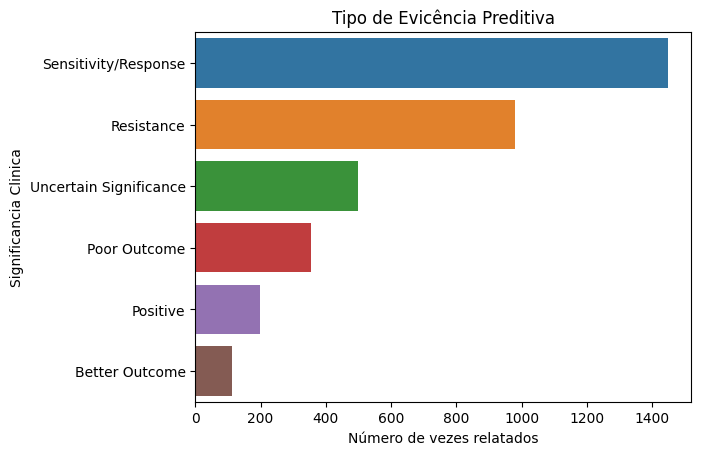

In [30]:
#Gráfico 7
sns.barplot(x = df_selecionado['significado_clínico'].value_counts()[:6],
            y = df_selecionado['significado_clínico'].value_counts()[:6].index)

plt.title("Tipo de Evicência Preditiva")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Significancia Clinica")
plt.show()

Como o perfil molecular reagiu ao tratamento ?

A maior parte teve uma resposta "Sensitivity/Responde", significa que o organismo respondeu ao estímulo, isso não quer dizer que a resposta foi possitiva ou negativa, apenas indica que ouve uma minima resposta. A menor parte "Better Outcome", ou seja, Demosntra resultado clínico melhor do que o esperado.

In [31]:
# Ordenar o DataFrame pelo valor da contagem em ordem decrescente
df_rating_counts = df_selecionado['classificação'].value_counts().sort_values(ascending=False)

In [32]:
# Grafico 8
#Preencher valores nulos com -1 (ou outro valor adequado)
df_selecionado['classificação'].fillna(-1, inplace=True)
# Converter os valores da coluna de classificação para inteiros
df_selecionado['classificação'] = df_selecionado['classificação'].astype(int)

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.



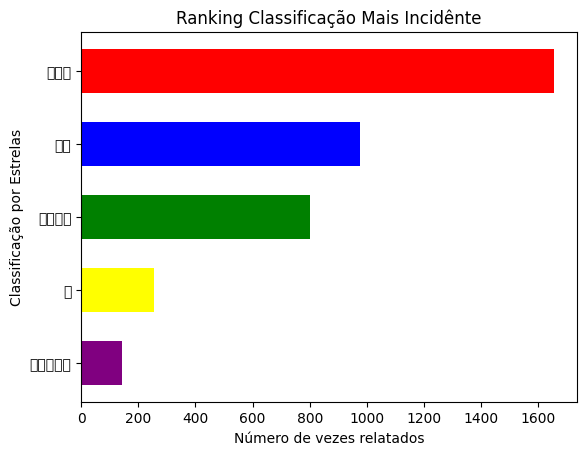

In [33]:
# Mapear as classificações para símbolos de estrela
classificacoes = df_selecionado['classificação'].value_counts().index[:5]
classificacoes_simbolos = {1: '⭐',
                           2: '⭐⭐',
                           3: '⭐⭐⭐',
                           4: '⭐⭐⭐⭐',
                           5: '⭐⭐⭐⭐⭐'}
classificacoes = [classificacoes_simbolos[c] for c in classificacoes]

# Ordenar o DataFrame pelo valor da contagem em ordem decrescente
#df_rating_counts = df_selecionado['classificação'].value_counts().sort_values(ascending=False)

# Definir cores para as barras
cores = ['red', 'blue', 'green', 'yellow', 'purple']
# Criar um gráfico de barras com classificações por estrelas usando a matplotlib
fig, ax = plt.subplots()
ax.barh(y=classificacoes, width=df_rating_counts[:5], height=0.6, color=cores)

# Definir o título e os rótulos dos eixos
ax.set_title("Ranking Classificação Mais Incidênte")
ax.set_xlabel("Número de vezes relatados")
ax.set_ylabel("Classificação por Estrelas")

# Inverter a ordem do eixo Y
ax.invert_yaxis()

# Exibir o gráfico
plt.show()

1 estrela': '⭐',
                                                                            '2 estrelas': '⭐⭐',
                                                                            '3 estrelas': '⭐⭐⭐',
                                                                            '4 estrelas': '⭐⭐⭐⭐',
                                                                            '5 estrelas': '⭐⭐⭐⭐⭐'

Esse gráfico serve para nos mostrar rapidamente o quão bem foi o tratamento escolhido. A maior parte dos tratamentos receberam 5 "estrelas", forma como foram avaliados, tendo eviências fortes e bem fundamentadas com resultados limpos. A menor parte recebeu 1 "estrela", significando que a alegação não foi bem sucedida, os resultados são sujos e não reprodutíveis ou têm um tamanho de amostra muito pequeno.

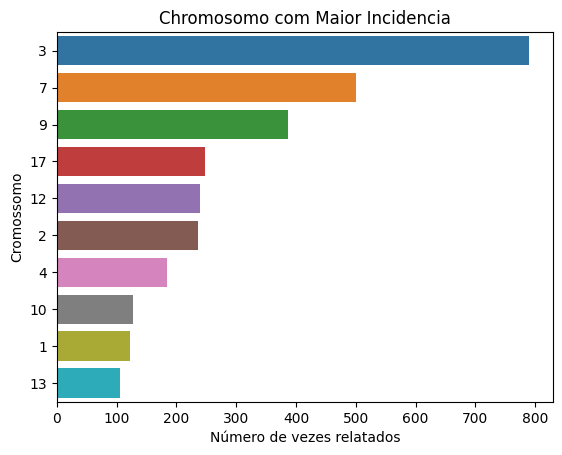

In [34]:
#Gráfico 9
sns.barplot(x = df_selecionado['cromossomo'].value_counts()[:10],
            y = df_selecionado['cromossomo'].value_counts()[:10].index)

plt.title("Chromosomo com Maior Incidencia")
plt.xlabel("Número de vezes relatados")
plt.ylabel("Cromossomo")
plt.show()

Esse gráfico é interessante pois nele podemos observar em quais cromossomos ouve a maior incidencia de mudanças, por exemplo o chromossomo 3. primeiro nesse gráfico, é onde ocorre a mutação que causa a doença VHL ou doença de Von Hippel-Lindau, os dois primeiros casos em gene e disease.

##Comparando Outras Colunas com Doenças



Fonte Visualização:https://plotly.com/python/

In [35]:
# agrupa os dados pela combinação de "gene" e "variant" e soma a quantidade de ocorrências de cada combinação
grouped_genes_df = df_selecionado.groupby(['gene', 'variante']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_genes_df = grouped_genes_df.sort_values('count', ascending=False)

# seleciona as informações mais relevantes
top_genes_df = sorted_genes_df.head(10)

In [36]:
# conta a frequência dos valores em cada coluna
var_counts = df_selecionado['variante'].value_counts().reset_index()
gene_counts = df_selecionado['gene'].value_counts().reset_index()

# renomeia as colunas
gene_counts.columns = ['gene', 'count']
var_counts.columns = ['variante', 'count']

In [37]:
# Cria o gráfico de barras
fig = px.bar(top_genes_df, x='variante', y='count', color='gene', 
             title='Frequência dos Genes por Variante',
             color_discrete_sequence=px.colors.qualitative.Pastel)#, template='plotly_dark')

# Personaliza os rótulos do eixo x e y
fig.update_xaxes(title='Variante')
fig.update_yaxes(title='Frequência')

# Mostra o gráfico
fig.show()

Combinação de "gene" e "variant" e soma da quantidade de ocorrências de cada combinação.

In [38]:
# agrupa os dados pela combinação de "variant_origin" e "disease" e soma a quantidade de ocorrências de cada combinação
grouped_origin_df = df_selecionado.groupby(['origem_variante', 'doença']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_origin_df = grouped_origin_df.sort_values('count', ascending=False)

# seleciona as informações mais relevantes
top_origin_df = sorted_origin_df.head(10)

In [39]:
# conta a frequência dos valores em cada coluna
var_counts = df_selecionado['doença'].value_counts().reset_index()
origin_counts = df_selecionado['origem_variante'].value_counts().reset_index()

# renomeia as colunas
origin_counts.columns = ['variant_origin', 'count']
var_counts.columns = ['disease', 'count']

# cria o gráfico de dispersão
fig = px.scatter(top_origin_df, x='doença', y='origem_variante', size='count',title='Identificando a origen da doença',
            color_discrete_sequence=px.colors.qualitative.Pastel,
            template='plotly_dark')

# mostra o gráfico
fig.show()

Com esse gráfico interativo podemos observar 15 itens de disease comparados a coluna variant_origin, podemos ver que a maioria dos cânceres são somaticos enquando 584 são geminativo raro e 14 germinativo comum.

In [40]:
# agrupa os dados pela combinação de "gene" e "variant" e soma a quantidade de ocorrências de cada combinação
grouped_genes_df = df_selecionado.groupby(['doença', 'gene']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_genes_df = grouped_genes_df.sort_values('count', ascending=False)

# seleciona as informações mais relevantes
top_genes_df = sorted_genes_df.head(10)

In [41]:
# Cria o gráfico de barras
fig = px.bar(top_genes_df, x='gene', y='count', color='doença', 
             title='Frequência da Doença por Gene',
             color_discrete_sequence=px.colors.qualitative.Pastel)#, #template='plotly_dark')

# Personaliza os rótulos do eixo x e y
fig.update_xaxes(title='gene')
fig.update_yaxes(title='Frequência')

# Mostra o gráfico
fig.show()

Com que frequencia doença é associada a gene ? VHL e Von Hippeç-Lindau tem um interação de quase 600, enquanto FLT3 e Acute Myloid Leukemia tem pouco menos de 100 intereções.

In [42]:
# agrupa os dados pela combinação de "gene" e "variant" e soma a quantidade de ocorrências de cada combinação
grouped_variant_df = df_selecionado.groupby(['doença', 'variante']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_variant_df = grouped_variant_df.sort_values('count', ascending=False)

# seleciona as informações mais relevantes
top_variant_df = sorted_variant_df.head(10)

In [43]:
# Cria o gráfico de barras
fig = px.bar(top_variant_df, x='variante', y='count', color='doença', 
             title='Frequência da Doença por Variante',
             color_discrete_sequence=px.colors.qualitative.Pastel)#, #template='plotly_dark')

# Personaliza os rótulos do eixo x e y
fig.update_xaxes(title='variant')
fig.update_yaxes(title='Frequência')

# Mostra o gráfico
fig.show()

Cada doença possui sua variant, quais as maiores interações ? Por exemplo: Mutation se relaciona com 3 diseases, colorectal cancer com uma contagem de 41 aparições, acute myeloid leukemia com 37 aparições e lung non-small cell com 36 aparições

In [44]:
# agrupa os dados pela combinação de "gene" e "variant" e soma a quantidade de ocorrências de cada combinação
grouped_drugs_df = df_selecionado.groupby(['doença', 'medicamentos']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_drugs_df = grouped_drugs_df.sort_values('count', ascending=False)

# seleciona as informações mais relevantes
top_drugs_df = sorted_drugs_df.head(10)

In [45]:
# Cria o gráfico de barras
fig = px.bar(top_drugs_df, x='medicamentos', y='count', color='doença', 
             title='Frequência dos Doenças por Medicamentos',
             color_discrete_sequence=px.colors.qualitative.Pastel)#, #template='plotly_dark')

# Personaliza os rótulos do eixo x e y
fig.update_xaxes(title='Medicamentos')
fig.update_yaxes(title='Frequência')

# Mostra o gráfico
fig.show()

Para cada câncer uma ou mais drogas são usadas em seus tratamentos, quais as melhores interações ?

Ex: Chronic Myeloid Leukemia tem uma grande interação com dasatinib, imatinib, bosutinib, imatinib mesylate, ou seja, esse tipo de câncer pode ser tratado com todas essas drogas mas a que mais é usada é a imatinib.

In [46]:
# agrupa os dados pela combinação de "gene" e "variant" e soma a quantidade de ocorrências de cada combinação
grouped_chromosome_type_df = df_selecionado.groupby(['doença', 'cromossomo']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_chromosome_type_df = grouped_chromosome_type_df.sort_values('count', ascending=False)

# seleciona as informações mais relevantes
top_chromosome_type_df = sorted_chromosome_type_df.head(10)

In [47]:
# Cria o gráfico de barras
fig = px.bar(top_chromosome_type_df, x='cromossomo', y='count', color='doença', 
             title='Frequência Doença por Cromossome',
             color_discrete_sequence=px.colors.qualitative.Pastel)#, #template='plotly_dark')

# Personaliza os rótulos do eixo x e y
fig.update_xaxes(title='Cromossome')
fig.update_yaxes(title='Frequência')

# Mostra o gráfico
fig.show()

Os tipos cancerigenos realmente tendem a atacar apenas um gene como padrão ? Melanoma ataca o gene 7 com incidencia de 7 itens, cartinoma ataca o gene 7 tambem mas com uma incidência de 134 itens e o Von Hippel ? Bom, ele ataca o gene 3 com uma incidência de 548 itens.

In [48]:
# agrupa os dados pela combinação de "gene" e "variant" e soma a quantidade de ocorrências de cada combinação
grouped_rating_type_df = df_selecionado.groupby(['doença', 'classificação']).size().reset_index(name='count')

# ordena os dados pela quantidade de ocorrências em ordem decrescente
sorted_rating_type_df = grouped_rating_type_df.sort_values('count', ascending=False)

# seleciona zzas informações mais relevantes
top_rating_type_df = sorted_rating_type_df.head(10)

In [49]:
# Cria o gráfico de barras
fig = px.bar(top_rating_type_df, x='classificação', y='count', color='doença', 
             title='Frequência da Doença por Classificação',
             color_discrete_sequence=px.colors.qualitative.Pastel)#, #template='plotly_dark')

# Personaliza os rótulos do eixo x e y
fig.update_xaxes(title='Classificação')
fig.update_yaxes(title='Frequência')

# Mostra o gráfico
fig.show()

Nem sempre o tratamento que funciona pra funciona pra todos, afinal cada pessoa é uma pessoa, por isso nesse gráfico visualizamos que o ranking pode variar dependendo da doença. Ex: Von Hippel recebeu entre 2 e 3 estrelas enquanto o carcinoma recebeu entre 2, 3 e 4 estrelas.

##Analísando Gene específico 

In [50]:
# Filtrar os dados para um gene específico
gene_alvo = 'KRAS' 
df_gene = df_selecionado[df_selecionado['gene'] == gene_alvo]

# Verificar se há dados para o gene alvo
if df_gene.empty:
    print(f"Não foram encontrados dados para o gene '{gene_alvo}'.")
else:
    # Contar as 2 mais comum variante do Gene Alvo
    tipos_variantes_counts = df_gene['variante'].value_counts().head(2)

    # Verificar se a sequência está vazia
    if tipos_variantes_counts.empty:
        print(f"Não foram encontrados tipos de variantes para o gene '{gene_alvo}'.")
    else:
        # Exibir os tipos de variantes do gene relacionado a doenças
        print(f"Tipos de Variantes para o Gene '{gene_alvo}':")
        print(tipos_variantes_counts)

Tipos de Variantes para o Gene 'KRAS':
Mutation    45
G12D        22
Name: variante, dtype: int64


In [51]:
#Filtrar as linhas que contêm o gene KRAS
gene_kras = df_selecionado[df_selecionado['gene'] == 'KRAS']

# Contar a ocorrência de cada doença associada ao gene KRAS
doencas_associadas = gene_kras['doença']#.value_counts()

# Obter as 3 principais doenças associadas ao gene KRAS
top_3_doencas = doencas_associadas.head(3)

# Exibir o resultado
print("As 3 principais doenças associadas ao gene KRAS:")
print(top_3_doencas)

As 3 principais doenças associadas ao gene KRAS:
6                    Acute Leukemia
30    Lung Non-small Cell Carcinoma
74                Colorectal Cancer
Name: doença, dtype: object


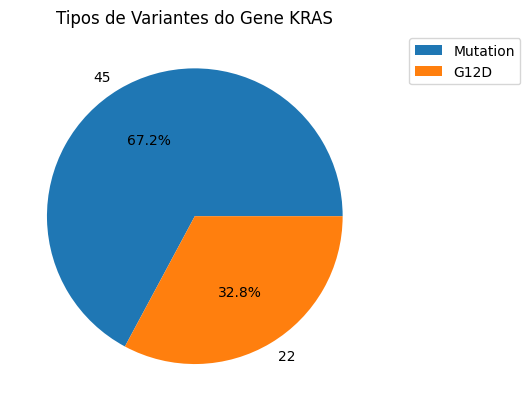

Principais Doenças Associadas ao Gene KRAS:
- Acute Leukemia
- Lung Non-small Cell Carcinoma
- Colorectal Cancer

Possíveis Medicamento para a Doença Associada:
- Imatinib
- Dasatinib
- Crizotinib
- Vemurafenib
- Erlotinib


In [52]:
# Criar um gráfico de pizza com os tipos de variantes mais comuns
plt.pie(tipos_variantes_counts, labels=tipos_variantes_counts, autopct='%1.1f%%')
plt.title('Tipos de Variantes do Gene KRAS')
plt.legend(labels=tipos_variantes_counts.index, loc='upper right', bbox_to_anchor=(1.40, 1))
plt.show()

# Possíveis Medicação para Doença do Variante do Gene Alvo 
medicamentos = df_selecionado['medicamentos'].value_counts().head(5).index.tolist() # Contar a ocorrência de cada medicamento

# Exibir as informações sobre as doenças e Medicamentos
print('Principais Doenças Associadas ao Gene KRAS:')
for doenca in top_3_doencas:
    print('- ' + doenca)
print('\nPossíveis Medicamento para a Doença Associada:')
for medicamento in medicamentos:
    print('- ' + medicamento)

Nessa Análise selecionamos um gene mais frequente(KRAS) em seguida descobrimos as 2 variante mais comum, Identificamos a doenças relacionada a ambos e buscamos o Possíveis Medicamento para a Doença Associada:


In [53]:
#Transformando os dados não númericos em númericos.
df_inteiro = df_selecionado[['gene', 'doença', 'variante', 'significado_clínico', 'origem_variante', 'nível_evidência', 'medicamentos']].apply(lambda x: pd.factorize(x)[0])

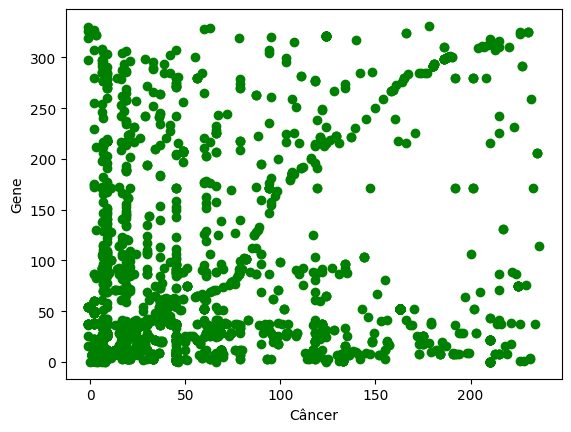

In [54]:
#Gráfico de dispersão (scattler plot)
# Pontos do Gráfico nazz côr verde (c = 'g')
plt.scatter(df_inteiro['doença'], df_inteiro['gene'], c='g')

plt.xlabel("Câncer")
plt.ylabel("Gene")

plt.show()

Usamos o scattler plot para observaro compartamento entre duas variáveis e sua relação, podemos ver que perto de 0 existe um grande aglomerado, pois essa são as váriais que mais aparencem em nossos dados.

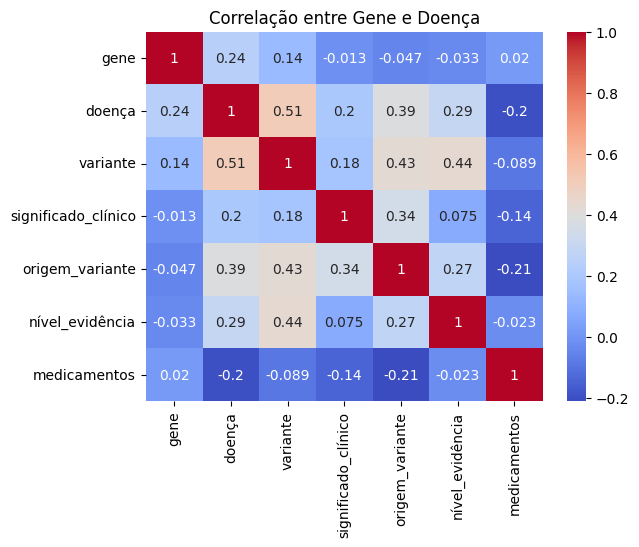

In [55]:
# Calcule a matriz de correlação
correlation_matrix = df_inteiro.corr()

# Crie o heatmap para visualizar a correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Correlação entre Gene e Doença")
plt.show()

Por fim uma matriz de correlação entre as variaveis mais usadas durante esse caderno, os valores próximos de 1 representam uma correlação positiva forte entre as variaveis. Quando mais proximo de -1 mais forte é a correlação negativa entre duas variaveis. Se o valor se aproxima de 0 indica que não há uma correlação linear forte.

##Relatório de Análise Exploratória de Dados da API CivicDB

A API fornece informações sobre genes associados a variantes e doenças. O conjunto de dados consiste em uma lista de genes, cada um com seus respectivos campos e valores.

1. Informações Gerais:


A API possui informações sobre 1402 genes.
Existem 3 campos obrigatórios para cada gene: "name", "entrez_id" e "variants_count"

2. Campos:

"gene": Nome do gene.
"entrez_id": ID do gene na base de dados NCBI Entrez.
"variants_count": Número de variantes associadas ao gene.
"description": Descrição do gene.
"aliases": Outros nomes pelos quais o gene é conhecido.
"tipo": Tipo de gene.
"location": Localização do gene.
"cromossomo": Cromossomo do gene.
"map_location": Localização no mapa genético.
"biotipo": Biótipo do gene.
"reference_genoma": Genoma de referência do gene.
"ensembl_id": ID do gene na base de dados Ensembl.
"símbolo": Símbolo do gene.
"hgnc_id": ID do gene na base de dados HGNC.
"summary": Resumo do gene.


3.   Distribuição dos dados:


O número de variantes associadas aos genes varia de 1 a 312.
A maioria dos genes tem menos de 50 variantes associadas.
Os genes estão distribuídos em diversos cromossomos.
Existem genes de diversos biótipos.



4.   Análise Adicional:


Seria interessante fazer uma análise de associação de genes com doenças e variantes para entender melhor a herança de cada gene na biologia e medicina.
Também seria interessante analisar a distribuição dos tipos de variantes associados a cada gene, para entender melhor o impacto das variantes no gene e suas funções biológicas.
Além disso, seria útil fazer uma análise de similaridade entre os genes com base em suas incorporadas e abstratas, para identificar possíveis grupos ou famílias de genes.




*   Conclusão: 

A API CivicDB fornece uma rica fonte de informações sobre genes, variantes e doenças. A análise exploratória realizada neste relatório mostra que existem diversos genes com diferentes níveis de resistência e associação com variantes. Uma análise mais aprofundada poderia ser útil para entender melhor a biologia e a medicina relacionadas a esses genes.

##Relatório da Tarefa Exploratória de Dados da API CIViC

Introdução: 
A API CIViC (Clinical Interpretation of Variants in Cancer) é uma plataforma online que fornece informações sobre variantes genéticas associadas ao câncer. Através da API, é possível acessar informações sobre genes, variantes, doenças, evidências clínicas e muito mais. Neste relatório, realizamos uma análise exploratória de dados da API CIViC, com o objetivo de entender a estrutura dos dados e identificar possíveis insights.

Metodologia:
Para realizar uma análise exploratória de dados da API CIViC, utilizamos uma biblioteca requests em Python para fazer requisições HTTP à API e obter os dados em formato JSON. Em seguida, utilizamos técnicas de manipulação de dados e visualização para analisar os dados obtidos.

Resultados:

Estrutura dos Dados: 
A API CIViC fornece informações sobre genes, variantes, doenças, evidências clínicas e outros dados relacionados ao câncer. Os dados estão organizados em uma estrutura de árvore, onde é possível navegar por diferentes níveis de informações, como genes, variantes e suas respectivas evidências.

Informações sobre Genes:
Os dados obtidos da API CIViC fornecem informações específicas sobre genes, incluindo o nome do gene, ID do gene, descrição do gene, ID do Entrez, entre outros. Essas informações podem ser utilizadas para identificar genes associados ao câncer e realizar análises genéticas.

Informações sobre Variantes:
A API CIViC também fornece informações específicas sobre variantes genéticas, incluindo o nome da variante, ID da variante, descrição da variante, doenças associadas, evidências clínicas e outras informações relevantes. Essas informações são úteis para compreender os dados.

Fim!